In [2]:
!pip install pandas nltk textblob matplotlib seaborn requests newspaper3k

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
     ---------------------------------------- 0.1/7.4 MB 469.7 kB/s eta 0:00:16
      --------------------------------------- 0.2/7.4 MB 919.0 kB/s eta 0:00:08
     - -------------------------------------- 0.3/7.4 MB 1.5 MB/s eta 0:00:05
     --- ------------------------------------ 0.6/7.4 MB 2.5 MB/s eta 0:00:03
     ----- ---------------------------------- 1.1/7.4 MB 3.7 MB/s eta 0:00:02
     -------- ------------------------------- 1.6/7.4 MB 4.7 MB/s eta 0:00:02
     ----------- ---------------------------- 2.2/7.4 MB 5.5 MB/s eta 0:00:01
     -------------- ------------------------- 2.6/7.4 MB 6.2 MB/s eta 0:00:01
     --------------- ------------------------ 2.9/7.4 MB 

In [3]:
#Load newsdata using newpaper3k 
from newspaper import Article 
url="https://www.bbc.com/news/articles/ce3nx1kd9q1o"
article = Article(url)
article.download()
article.parse()
news_text=article.text
print(news_text[:500])

Mysterious New Jersey drones were 'not the enemy' - White House

White House: Mysterious New Jersey drones 'not the enemy'

Authorities never provided definitive answers about the sightings, saying only that they were not a danger to the public or national security.

The drones were spotted in New Jersey and other nearby states in November and December and led to rampant online speculation about their origins and intentions.

The Federal Aviation Administration (FAA) had approved the drones for 


In [4]:
#Perform sentiment analysis using Textblob
from textblob import TextBlob
sentiment=TextBlob(news_text).sentiment
print(f"Polarity:{sentiment.polarity},Subjectivity{sentiment.subjectivity}")

Polarity:0.06179503367003367,Subjectivity0.3664772727272727


In [7]:
#Sentiment Analysis Using NLTK’s VADER 
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download("vader_lexicon")
sia=SentimentIntensityAnalyzer()
sentiment_scores=sia.polarity_scores(news_text)
print(sentiment_scores)
if sentiment_scores["compound"]>0:
    sentiment_label="Positive"
elif sentiment_scores["compound"]<0:
    sentiment_label="Negative"
else:
    sentiment_label="Neutral"
print(f"Overall Sentiment:{sentiment_label}")

{'neg': 0.051, 'neu': 0.909, 'pos': 0.04, 'compound': -0.5875}
Overall Sentiment:Negative


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\preshtha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


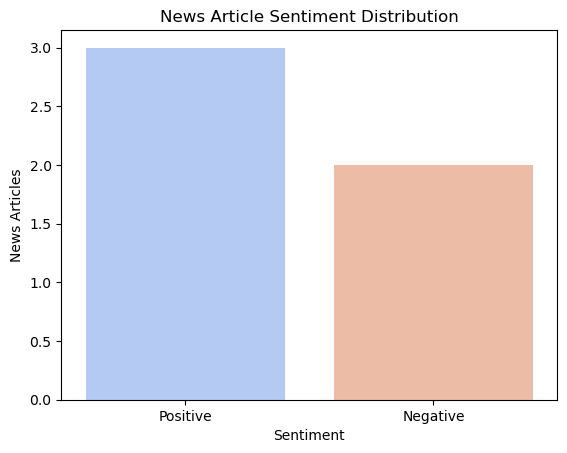

In [9]:
#Visualizing sentiment Distribution
import seaborn as sns
import matplotlib.pyplot as plt
sentiments=[0.2,-0.5,0.8,-0.1,0.4]
labels=["Positive" if s>0 else "Negative" if s<0 else "Neutral" for s in sentiments]
sns.countplot(x=labels,palette="coolwarm")
plt.title("News Article Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("News Articles")
plt.show()

In [10]:
#TextBlob gives a simple sentiment score based on popularity
#VADER(from NLTK) is better suited for short texts like headlines or news articles
#Deep learning like BERT can be used for more accurate sentiment classification
